# Logistical Regression Classification Model - Medical No Shows

This notebook assesses the feature relevance for Medical no shows in a Logistical Regression Classification Model. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import os

### Load and view data

In [2]:
data = pd.read_csv('../data/cleanData/appointment_dataset.csv')
data.head()

,appointment_id,patient_id,repeat_patient_yn,gender_yn,time_between_sch_appt,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,...,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,no_show_yn
0,5698125,678814354693913,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5698246,54593736353128,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,5699393,4369164743113,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,5694371,54523365344664,0,1,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5698279,62917816238835,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


### Drop irrelevant columns

In [3]:
clean_data = data.drop(['appointment_id', 'patient_id','time_between_sch_appt'], axis=1)

print(f"Shape of the data is: {clean_data.shape}")

Shape of the data is: (110521, 26)


### Assign X (data for modelling) and y (target)

In [4]:
X = clean_data.drop('no_show_yn', axis=1)
y = clean_data['no_show_yn']
print(X.shape, y.shape)

(110521, 25) (110521,)


### Split our data into training and testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### Create a Logistic Regression Model

In [6]:
classifier = LogisticRegression()

classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Fit (train) model using the training data

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Validate the model using the test data

In [8]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7982506936904331
Testing Data Score: 0.7979443378813651


### Make predictions

In [9]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### View predictions along with their probabilities of being within each class

In [10]:
probs = classifier.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(Show)": [p[0] for p in probs], 
    "P(Noshow)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(Show),P(Noshow)
0,0,0,0.799542,0.200458
1,0,0,0.801779,0.198221
2,0,0,0.950956,0.049044
3,0,0,0.777896,0.222104
4,0,0,0.701982,0.298018
5,0,0,0.955072,0.044928
6,0,0,0.961933,0.038067
7,0,0,0.796186,0.203814
8,0,0,0.965095,0.034905
9,0,0,0.945315,0.054685


### Create a Confusion Matrix

In [11]:
confusion_matrix(y_test,predictions)

array([[22045,     7],
       [ 5576,     3]])

### Label the Confusion Matrix

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 22045   False Pos: 7
False Neg: 5576  True Pos: 3


### Plot Confusion Matrix of test data
Check out matrix of true positives, true negatives, false positives, and false negatives

Text(0.5, 1.0, 'Original Dataset Confusion Matrix')

<Figure size 576x576 with 0 Axes>

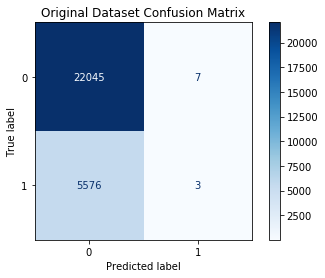

In [24]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, values_format='.5g')
plt.title('Original Dataset Confusion Matrix')

In [14]:
# evaluate the model using model evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test,predictions))

Accuracy: 0.7979443378813651
Precision: 0.3
Recall: 0.0005377307761247536
Matthews Correlation Coefficient: 0.0046493848223451125


### ROC Curve

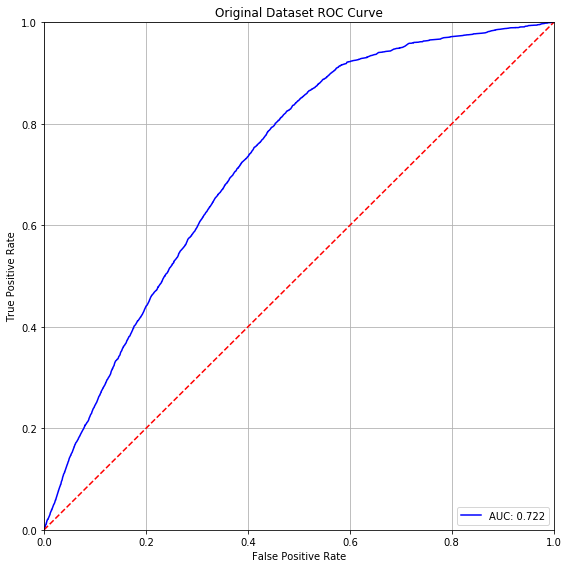

In [25]:
plt.figure(figsize=(8,8))
predictions_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.title('Original Dataset ROC Curve')
plt.plot(fpr, tpr, 'b', label="AUC: {:.3f}".format(auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.tight_layout()

plt.savefig('ROC_LR_original.png')

plt.show()


### Find Coefficients of Attributes
Which attributes are most strongly correlated with being a noshow? The more positive the coefficient, the more likely of being a noshow, whereas the more negative the coefficient, the less likely to be a noshow.

In [16]:
attribute_coef = sorted(zip(classifier.coef_[0], X.columns), reverse=True)
attribute_coef

[(0.9646916801644437, 'advanced_appt_yn'),
 (0.5110923963875663, 'within_week_appt_yn'),
 (0.27137063712945647, 'alcoholism'),
 (0.25569597777839337, 'young_adult_yn'),
 (0.24798674714431593, 'welfare_assistance'),
 (0.17953610644134343, 'saturday_yn'),
 (0.1698945554149497, 'repeat_patient_yn'),
 (0.14514312323561807, 'diabetes'),
 (0.13988188523653394, 'child_yn'),
 (0.07576791529388144, 'handicap_yn'),
 (0.06583520106454466, 'neighborhood_income_lower_yn'),
 (0.050707522048025096, 'gender_yn'),
 (0.02323589120836922, 'day_after_holiday_yn'),
 (0.01716868801320757, 'monday_yn'),
 (-0.009522268299172371, 'tuesday_yn'),
 (-0.030683718461997075, 'friday_yn'),
 (-0.053394742781990225, 'neighborhood_income_middle_yn'),
 (-0.05370296280940274, 'neigborhood_income_higher_yn'),
 (-0.06989859596991749, 'adult_yn'),
 (-0.07678785530691003, 'wednesday_yn'),
 (-0.1209734569136606, 'thursday_yn'),
 (-0.1210027194408329, 'hypertension'),
 (-0.21151109706042326, 'sms_received'),
 (-0.36694177157235

In [17]:
LRattribute_coef_df = pd.DataFrame(attribute_coef, columns=['coefficients','attributes'])
LRattribute_coef_df = LRattribute_coef_df.sort_values(by='coefficients', ascending=False)
LRattribute_coef_df

,coefficients,attributes
0,0.964692,advanced_appt_yn
1,0.511092,within_week_appt_yn
2,0.271371,alcoholism
3,0.255696,young_adult_yn
4,0.247987,welfare_assistance
5,0.179536,saturday_yn
6,0.169895,repeat_patient_yn
7,0.145143,diabetes
8,0.139882,child_yn
9,0.075768,handicap_yn


In [18]:
#Export to csv 
LRattribute_coef_df.to_csv('../data/cleanData/modelResults/LRattribute_coef.csv', index = False, header=True)

### Rank Attribute Importance
Rank the attributes is most to least important

In [19]:
LRattribute_importance_df = LRattribute_coef_df.reindex(LRattribute_coef_df.coefficients.abs()
                                                        .sort_values(ascending=False).index)

LRattribute_importance_df

,coefficients,attributes
24,-1.517047,same_day_appt_yn
0,0.964692,advanced_appt_yn
1,0.511092,within_week_appt_yn
23,-0.366942,senior_yn
2,0.271371,alcoholism
3,0.255696,young_adult_yn
4,0.247987,welfare_assistance
22,-0.211511,sms_received
5,0.179536,saturday_yn
6,0.169895,repeat_patient_yn


In [20]:
LRattribute_importance_df=LRattribute_importance_df.set_index('attributes')

LRattribute_importance_df

,coefficients
attributes,
same_day_appt_yn,-1.517047
advanced_appt_yn,0.964692
within_week_appt_yn,0.511092
senior_yn,-0.366942
alcoholism,0.271371
young_adult_yn,0.255696
welfare_assistance,0.247987
sms_received,-0.211511
saturday_yn,0.179536


### Plot Attribute Coefficients

<Figure size 432x288 with 0 Axes>

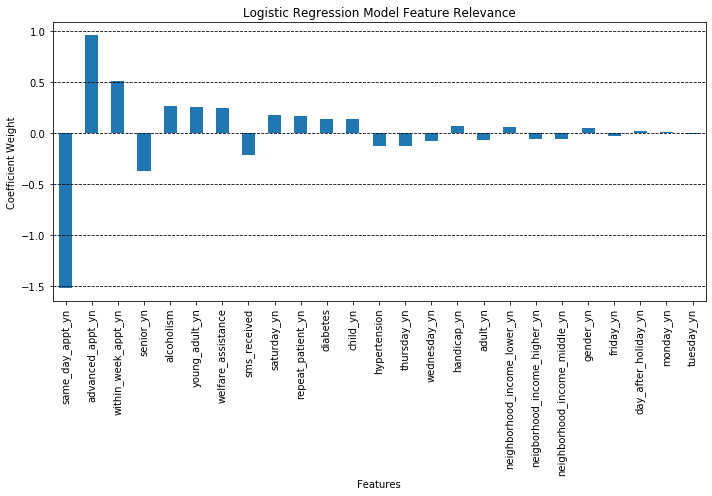

In [21]:
plt.figure()
LRattribute_importance_df.plot(kind="bar", legend=False, figsize=(10, 7))
plt.title("Logistic Regression Model Feature Relevance")
plt.ylabel("Coefficient Weight")
plt.xlabel("Features")

plt.grid(axis="y", color="k", linestyle="--")
plt.tight_layout()
plt.savefig("feature_relevance_LR_original.png")

plt.show()